## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.645339  0.523830 -1.150453 -0.145548  0.517455  0.391591
1 -0.141798  1.579772 -0.105998 -0.553252  0.039936  0.302522
2 -1.640225 -0.542374 -0.329001 -1.527776  0.411052 -2.109372
3  1.206289 -1.691811  0.519645  0.584962  0.136134 -0.925949
4  0.331785 -1.361171  0.704031  1.286352  1.577121  0.417263


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9896580	total: 56.8ms	remaining: 56.8s
1:	learn: 0.9816217	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9728647	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9624844	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9548034	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9468802	total: 59.8ms	remaining: 9.9s
6:	learn: 0.9367338	total: 60.2ms	remaining: 8.55s
7:	learn: 0.9306024	total: 60.9ms	remaining: 7.55s
8:	learn: 0.9225159	total: 61.4ms	remaining: 6.76s
9:	learn: 0.9145305	total: 61.9ms	remaining: 6.13s
10:	learn: 0.9050646	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8960954	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8881114	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8803510	total: 64ms	remaining: 4.5s
14:	learn: 0.8734904	total: 64.5ms	remaining: 4.23s
15:	learn: 0.8651539	total: 65ms	remaining: 4s
16:	learn: 0.8577099	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8505250	total: 66ms	remaining: 3.6s
18:	learn: 0.8433858	total: 66.5ms	remaining: 3.43s
19:	

87:	learn: 0.4708898	total: 102ms	remaining: 1.06s
88:	learn: 0.4671067	total: 103ms	remaining: 1.05s
89:	learn: 0.4639293	total: 103ms	remaining: 1.04s
90:	learn: 0.4608809	total: 103ms	remaining: 1.03s
91:	learn: 0.4561181	total: 105ms	remaining: 1.03s
92:	learn: 0.4529107	total: 105ms	remaining: 1.02s
93:	learn: 0.4487648	total: 106ms	remaining: 1.02s
94:	learn: 0.4452549	total: 106ms	remaining: 1.01s
95:	learn: 0.4418724	total: 107ms	remaining: 1s
96:	learn: 0.4404607	total: 107ms	remaining: 995ms
97:	learn: 0.4372365	total: 107ms	remaining: 987ms
98:	learn: 0.4333166	total: 108ms	remaining: 981ms
99:	learn: 0.4292079	total: 108ms	remaining: 975ms
100:	learn: 0.4266461	total: 109ms	remaining: 969ms
101:	learn: 0.4234830	total: 109ms	remaining: 962ms
102:	learn: 0.4200859	total: 110ms	remaining: 957ms
103:	learn: 0.4166285	total: 110ms	remaining: 951ms
104:	learn: 0.4134803	total: 111ms	remaining: 945ms
105:	learn: 0.4108028	total: 111ms	remaining: 938ms
106:	learn: 0.4075775	total:

249:	learn: 0.1390037	total: 185ms	remaining: 554ms
250:	learn: 0.1380662	total: 185ms	remaining: 553ms
251:	learn: 0.1369221	total: 186ms	remaining: 551ms
252:	learn: 0.1360147	total: 186ms	remaining: 550ms
253:	learn: 0.1351791	total: 187ms	remaining: 548ms
254:	learn: 0.1342280	total: 187ms	remaining: 547ms
255:	learn: 0.1332485	total: 188ms	remaining: 545ms
256:	learn: 0.1321459	total: 188ms	remaining: 544ms
257:	learn: 0.1313712	total: 189ms	remaining: 542ms
258:	learn: 0.1305926	total: 189ms	remaining: 541ms
259:	learn: 0.1296012	total: 189ms	remaining: 539ms
260:	learn: 0.1287371	total: 190ms	remaining: 537ms
261:	learn: 0.1276981	total: 190ms	remaining: 536ms
262:	learn: 0.1268050	total: 191ms	remaining: 534ms
263:	learn: 0.1260396	total: 191ms	remaining: 533ms
264:	learn: 0.1253129	total: 192ms	remaining: 531ms
265:	learn: 0.1242759	total: 192ms	remaining: 529ms
266:	learn: 0.1233913	total: 192ms	remaining: 528ms
267:	learn: 0.1223357	total: 193ms	remaining: 526ms
268:	learn: 

443:	learn: 0.0413028	total: 285ms	remaining: 356ms
444:	learn: 0.0410827	total: 286ms	remaining: 356ms
445:	learn: 0.0408777	total: 286ms	remaining: 355ms
446:	learn: 0.0407356	total: 287ms	remaining: 355ms
447:	learn: 0.0405212	total: 287ms	remaining: 354ms
448:	learn: 0.0402921	total: 288ms	remaining: 353ms
449:	learn: 0.0401140	total: 289ms	remaining: 353ms
450:	learn: 0.0398975	total: 289ms	remaining: 352ms
451:	learn: 0.0396858	total: 289ms	remaining: 351ms
452:	learn: 0.0395202	total: 290ms	remaining: 350ms
453:	learn: 0.0393861	total: 290ms	remaining: 349ms
454:	learn: 0.0391945	total: 291ms	remaining: 348ms
455:	learn: 0.0389831	total: 291ms	remaining: 348ms
456:	learn: 0.0388243	total: 292ms	remaining: 347ms
457:	learn: 0.0386956	total: 292ms	remaining: 346ms
458:	learn: 0.0384903	total: 293ms	remaining: 345ms
459:	learn: 0.0382889	total: 293ms	remaining: 344ms
460:	learn: 0.0380873	total: 294ms	remaining: 343ms
461:	learn: 0.0378916	total: 294ms	remaining: 342ms
462:	learn: 

601:	learn: 0.0185770	total: 367ms	remaining: 242ms
602:	learn: 0.0184903	total: 367ms	remaining: 242ms
603:	learn: 0.0184151	total: 368ms	remaining: 241ms
604:	learn: 0.0183351	total: 368ms	remaining: 240ms
605:	learn: 0.0182330	total: 369ms	remaining: 240ms
606:	learn: 0.0181598	total: 369ms	remaining: 239ms
607:	learn: 0.0180811	total: 370ms	remaining: 238ms
608:	learn: 0.0180092	total: 370ms	remaining: 238ms
609:	learn: 0.0179383	total: 370ms	remaining: 237ms
610:	learn: 0.0178524	total: 371ms	remaining: 236ms
611:	learn: 0.0177827	total: 371ms	remaining: 235ms
612:	learn: 0.0177045	total: 372ms	remaining: 235ms
613:	learn: 0.0176415	total: 372ms	remaining: 234ms
614:	learn: 0.0175667	total: 373ms	remaining: 233ms
615:	learn: 0.0174910	total: 373ms	remaining: 232ms
616:	learn: 0.0174182	total: 373ms	remaining: 232ms
617:	learn: 0.0173378	total: 374ms	remaining: 231ms
618:	learn: 0.0172626	total: 374ms	remaining: 230ms
619:	learn: 0.0172003	total: 375ms	remaining: 230ms
620:	learn: 

795:	learn: 0.0088357	total: 467ms	remaining: 120ms
796:	learn: 0.0088031	total: 468ms	remaining: 119ms
797:	learn: 0.0087660	total: 468ms	remaining: 118ms
798:	learn: 0.0087298	total: 468ms	remaining: 118ms
799:	learn: 0.0087014	total: 469ms	remaining: 117ms
800:	learn: 0.0086661	total: 469ms	remaining: 117ms
801:	learn: 0.0086342	total: 469ms	remaining: 116ms
802:	learn: 0.0086065	total: 470ms	remaining: 115ms
803:	learn: 0.0085689	total: 470ms	remaining: 115ms
804:	learn: 0.0085416	total: 475ms	remaining: 115ms
805:	learn: 0.0084951	total: 476ms	remaining: 115ms
806:	learn: 0.0084708	total: 477ms	remaining: 114ms
807:	learn: 0.0084472	total: 477ms	remaining: 113ms
808:	learn: 0.0084183	total: 478ms	remaining: 113ms
809:	learn: 0.0083827	total: 478ms	remaining: 112ms
810:	learn: 0.0083435	total: 479ms	remaining: 112ms
811:	learn: 0.0083108	total: 479ms	remaining: 111ms
812:	learn: 0.0082756	total: 480ms	remaining: 110ms
813:	learn: 0.0082372	total: 480ms	remaining: 110ms
814:	learn: 

945:	learn: 0.0052076	total: 549ms	remaining: 31.3ms
946:	learn: 0.0051880	total: 549ms	remaining: 30.7ms
947:	learn: 0.0051693	total: 550ms	remaining: 30.2ms
948:	learn: 0.0051447	total: 550ms	remaining: 29.6ms
949:	learn: 0.0051200	total: 551ms	remaining: 29ms
950:	learn: 0.0051022	total: 551ms	remaining: 28.4ms
951:	learn: 0.0050989	total: 552ms	remaining: 27.8ms
952:	learn: 0.0050956	total: 552ms	remaining: 27.2ms
953:	learn: 0.0050758	total: 553ms	remaining: 26.7ms
954:	learn: 0.0050560	total: 553ms	remaining: 26.1ms
955:	learn: 0.0050368	total: 554ms	remaining: 25.5ms
956:	learn: 0.0050198	total: 555ms	remaining: 24.9ms
957:	learn: 0.0050030	total: 555ms	remaining: 24.3ms
958:	learn: 0.0049791	total: 556ms	remaining: 23.7ms
959:	learn: 0.0049762	total: 556ms	remaining: 23.2ms
960:	learn: 0.0049598	total: 556ms	remaining: 22.6ms
961:	learn: 0.0049430	total: 557ms	remaining: 22ms
962:	learn: 0.0049197	total: 557ms	remaining: 21.4ms
963:	learn: 0.0049167	total: 557ms	remaining: 20.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

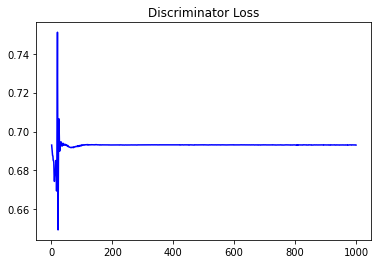

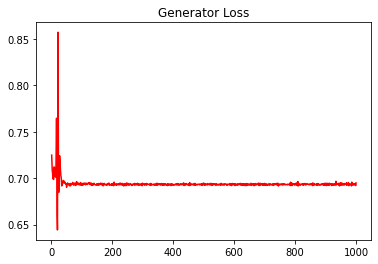

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23530636280012854


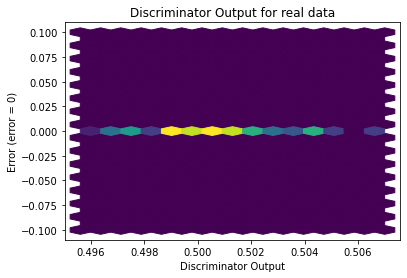

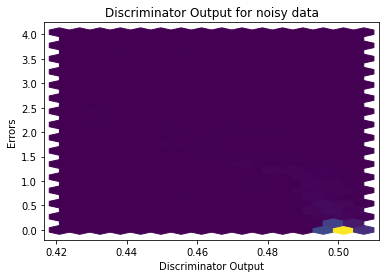

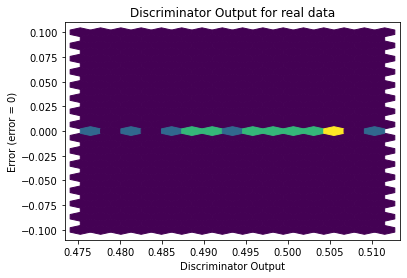

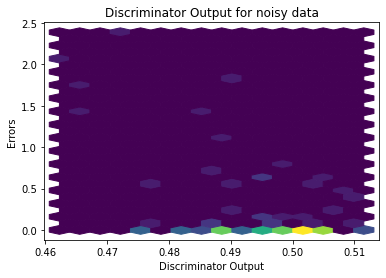

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


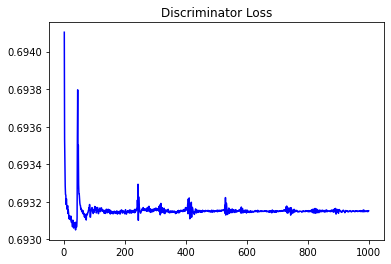

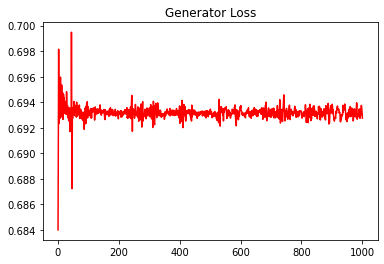

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2361924314821992


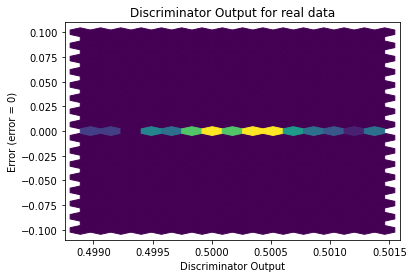

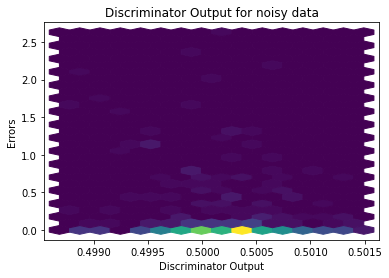

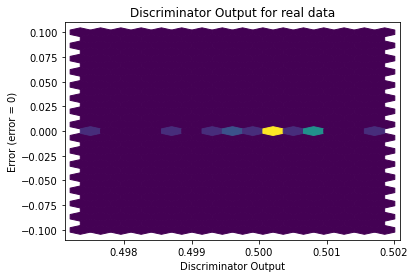

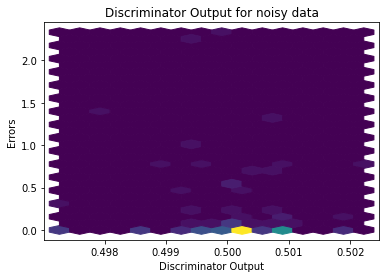

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0239]], requires_grad=True)
